# Milestone 2, SoloProject
## Reading CSV files
The following part will read 3 different csv files between the logistic company and CocaCola:
-  Logistic Company: has two files with the same columns that means trip_id, driver, trailer_plate, truck_plate, date, start_location, end_location, and kilometers. Moreover, each file has a different department that are:
    * Water
    * Soda
- CocaCola: the company just provide one file for both departments and the columns are date, trip_id, start_location, end_location, truck_plate, and kilometers.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
from scripts import project_functions as pf


df_logistic_water = pf.read_csvfile('../data/raw/*bitacora_agua.csv')
df_logistic_water.fillna(np.nan)
print(len(df_logistic_water), '\n')

df_logistic_soda = pf.read_csvfile('../data/raw/*bitacora_gaseosa.csv')
print(len(df_logistic_soda), '\n')
df_logistic_soda.fillna(np.nan)

df_cocacola = pf.read_csvfile('../data/raw/*nomina.csv')
print(len(df_cocacola), '\n')
df_cocacola.fillna(np.nan)


21304 

19561 

41507 



,fecha,remision,origen,destino,placa,kilometros
0,1/1/2020,01R71076187,01 - PLANTA SOYAPANGO,14 - NIXAPA,C-119-111,24.0
1,1/1/2020,14R70222636,14 - NIXAPA,01 - PLANTA SOYAPANGO,C-119-111,29.0
2,2/1/2020,04R70259299,04 - SANTA ANA,14 - NIXAPA,C-119-111,55.0
3,2/1/2020,04R70259468,04 - SANTA ANA,14 - NIXAPA,C-119-111,55.0
4,2/1/2020,14R70222659,14 - NIXAPA,04 - SANTA ANA,C-119-111,54.0
...,...,...,...,...,...,...
846,30/10/2020,14R70237538,14 - NIXAPA,06 - SONSONATE,C-117-025,61.0
847,31/10/2020,06R70126254,06 - SONSONATE,14 - NIXAPA,C-117-025,62.0
848,31/10/2020,06R70126263,06 - SONSONATE,14 - NIXAPA,C-117-025,62.0
849,31/10/2020,14R70237423,14 - NIXAPA,01 - PLANTA SOYAPANGO,C-117-025,29.0


## Data Cleaning

### Logistic Company
This files have inconsistent data and the data analysis its necessary to perfome some modifications for reading errors and for consistency puporse.

- Reading Errors: since the files have extra spanish letters (ISO-8859-1), when we are trying to read the file we can observed the character Ê instead of spaces.
- Consistency Errors:
    * start_location and end_location: it is necessary to trim the strings.
    * truck_plate: delete character -.
    
    

In [2]:
print(df_logistic_water.dtypes)

remision         object
piloto           object
placa_rastra    float64
placa            object
fecha            object
origen           object
destino          object
kilometros       object
dtype: object


In [3]:
df_logistic_water

,remision,piloto,placa_rastra,placa,fecha,origen,destino,kilometros
0,29R70186356,JOSE LUIS ELIAS,4989.0,61568,2020-01-01,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,04 - SANTA ANA ÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊ,74
1,04R70259289,JOSE LUIS ELIAS,4989.0,61568,2020-01-01,04 - SANTA ANA ÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊ,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,74
2,29R70186398,JOSE LUIS ELIAS,4989.0,61568,2020-01-01,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,01 - PLANTA SOYAPANGO ÊÊÊÊÊÊÊÊÊÊÊÊÊ,4
3,01R71076200,JOSE LUIS ELIAS,4989.0,61568,2020-01-02,01 - PLANTA SOYAPANGO ÊÊÊÊÊÊÊÊÊÊÊÊÊ,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,5.5
4,29R70186404,JOSE LUIS ELIAS,4989.0,61568,2020-01-02,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,01 - PLANTA SOYAPANGO ÊÊÊÊÊÊÊÊÊÊÊÊÊ,4
...,...,...,...,...,...,...,...,...
448,01R71103097,PEDRO EDUARDO BELTRAN BONILLA,4994.0,C-117884,2020-10-31,01 - PLANTA SOYAPANGO ÊÊÊÊÊÊÊÊÊÊÊÊÊ,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,5.5
449,29R70202045,PEDRO EDUARDO BELTRAN BONILLA,4994.0,C-117884,2020-10-31,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,01 - PLANTA SOYAPANGO ÊÊÊÊÊÊÊÊÊÊÊÊÊ,4
450,29R70202048,JULIO CESAR VASQUEZ RAMOS,10178.0,C-104742,2020-10-31,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,04 - SANTA ANA ÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊÊ,74
451,29R70202030,RENE ARMANDO DIAZ MELGAR,6938.0,C-97331,2020-10-31,29 - PLANTA JUGO SAN SALV. ÊÊÊÊÊÊÊÊ,01 - PLANTA SOYAPANGO ÊÊÊÊÊÊÊÊÊÊÊÊÊ,4


In [4]:
pf.clean_logistic(df_logistic_water)
pf.clean_logistic(df_logistic_soda)
df_logistic_water

,remision,piloto,placa_rastra,placa,fecha,origen,destino,kilometros
0,29R70186356,JOSE LUIS ELIAS,4989,NaN,2020-01-01,29 - PLANTA JUGO SAN SALV.,04 - SANTA ANA,NaN
1,04R70259289,JOSE LUIS ELIAS,4989,NaN,2020-01-01,04 - SANTA ANA,29 - PLANTA JUGO SAN SALV.,NaN
2,29R70186398,JOSE LUIS ELIAS,4989,NaN,2020-01-01,29 - PLANTA JUGO SAN SALV.,01 - PLANTA SOYAPANGO,NaN
3,01R71076200,JOSE LUIS ELIAS,4989,NaN,2020-01-02,01 - PLANTA SOYAPANGO,29 - PLANTA JUGO SAN SALV.,NaN
4,29R70186404,JOSE LUIS ELIAS,4989,NaN,2020-01-02,29 - PLANTA JUGO SAN SALV.,01 - PLANTA SOYAPANGO,NaN
...,...,...,...,...,...,...,...,...
448,01R71103097,PEDRO EDUARDO BELTRAN BONILLA,4994,C-117884,2020-10-31,01 - PLANTA SOYAPANGO,29 - PLANTA JUGO SAN SALV.,NaN
449,29R70202045,PEDRO EDUARDO BELTRAN BONILLA,4994,C-117884,2020-10-31,29 - PLANTA JUGO SAN SALV.,01 - PLANTA SOYAPANGO,NaN
450,29R70202048,JULIO CESAR VASQUEZ RAMOS,10178,C-104742,2020-10-31,29 - PLANTA JUGO SAN SALV.,04 - SANTA ANA,NaN
451,29R70202030,RENE ARMANDO DIAZ MELGAR,6938,C-97331,2020-10-31,29 - PLANTA JUGO SAN SALV.,01 - PLANTA SOYAPANGO,NaN


## Data Analysis

### Warehouses

Based on the trip records from CocaCola and the logistic company, both must have a consistent number of warehouses. If there is more variables, it means that there must be a wrong typing from one party.

    

In [5]:
(df_cocacola[['origen', 'destino']]).nunique(axis=0)

origen     20
destino    21
dtype: int64

In [6]:
(df_logistic_water[['origen', 'destino']]).nunique(axis=0)

origen     46
destino    44
dtype: int64

In [7]:
(df_logistic_soda[['origen', 'destino']]).nunique(axis=0)

origen     152
destino    164
dtype: int64

#### Result
Based on this result, we can conclude that the logistic company must have one type of inconsistency while typing the trip, that consist of 'origen' that is the start location and 'destino' which is the end. The results are:
- Coca Cola Company:
    * Unique start locations: 20
    * Unique end locations: 21
- Logistic Company, department of water:
    * Unique start locations: 46
    * Unique end locations: 44
- Logistic Company, department of soda:
    * Unique start locations: 152
    * Unique end locations: 164
 
Based on the result, does the logistic company has a lot of inconsistency while typing their records?
    
### Analysis 
Lets try to get a pandas DataFrame with unique values

#### DataFrame of Warehouses typed by CocaCola


In [8]:
hq_cocacola = pf.getWarehouses(df_cocacola)
hq_cocacola

,Warehouses
0,01 - PLANTA SOYAPANGO
1,04 - SANTA ANA
2,05 - SAN MIGUEL
3,06 - SONSONATE
4,07 - USULUTAN
5,08 - PASATIEMPO
6,11 - CHALATENANGO
7,12 - LA UNION
8,14 - NIXAPA
9,17 - EXPORTACIONES CERVEZA


#### DataFrame of Warehouses typed by Logisitc Company Department of Water


In [9]:
hq_logistic_water = pf.getWarehouses(df_logistic_water)
hq_logistic_water

,Warehouses
0,01 - PLANTA SOYAPANGO
1,04 - SANTA ANA
2,05 - SAN MIGUEL
3,05-SAN MIGUEL
4,06 SAN MIGUEL
5,06 - SONSONATE
6,06-SONSONATE
7,07 - USULUTAN
8,07 USULUTAN
9,07- USULUTAN


#### DataFrame of Warehouses typed by Logisitc Company Department of Soda


In [10]:
hq_logistic_soda = pf.getWarehouses(df_logistic_soda)
hq_logistic_soda

,Warehouses
0,01 PLANTA SOYAPANGO
1,01 - PLANTA SOYAPANGO
2,01-CD SOYAPANGO
3,01-NIXAPA
4,01-SOYAPANGO
...,...
171,TVH
172,WALMART
173,WALTMART
174,XD CHALATENANGO


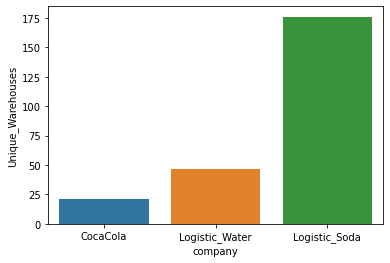

In [11]:
result = pd.DataFrame({'company' : ['CocaCola', 'Logistic_Water', 'Logistic_Soda'],
                       'Unique_Warehouses' : [len(hq_cocacola), len(hq_logistic_water), len(hq_logistic_soda)]})
ax = sns.barplot(data=result, x='company', y='Unique_Warehouses')


## Conclusion
By using an automated processes, only Cocacola is able to keep a consistent information about the warehouses for a trip.

### Trips_id
As a logistic company that have inconsistency in the data or Cocacola that is such a big enterprise, there must be different cases in their records:
- Case 1: Cocacola and the logistic record the trip
- Case 2: Cocacola payed a trip that the logistic company did not have one records
- Case 3: The logistic company have a record that was not payed by CocaCola


Are all the cases existent in these datasets?

In [12]:
df_cocacola['remision'].nunique()

41507

In [13]:
df_logistic_water['remision'].nunique() + df_logistic_soda['remision'].nunique()

39938

## Analysis
We can observe that there is a difference of unique values between both of the enterprises, lets try to make a visual representation of this

In [14]:
remisiones_df = pf.getRemisionesCases(df_cocacola, df_logistic_water, df_logistic_soda)
remisiones_df

,cocacola,logistic_water,logistic_soda,case
01R71043892,True,True,False,Case 1
01R71044238,True,False,True,Case 1
01R71070550,True,False,True,Case 1
01R71072969,True,False,True,Case 1
01R71073556,True,False,True,Case 1
...,...,...,...,...
95R70607127,False,False,True,Case 3
TALLER,False,False,True,Case 3
TLA,False,False,True,Case 3
TVH,False,False,True,Case 3


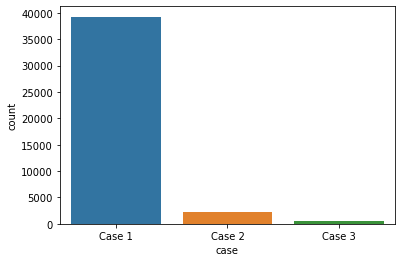

In [15]:
ax = sns.countplot(data=remisiones_df, x='case')


## Conclusion
Based on our analysis, we can affirm the three hypothetical cases of the trip_id. For the different cases in which we need to go in further detail to create a solution for this problem.